In [476]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import gmaps
import os

from api_keys import g_key

base_url="https://api.rawg.io/api/"

In [477]:
game_df=pd.read_csv("csvfiles/game.csv")
game_df

,Unnamed: 0,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added,month
0,0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,4.67,5,3480,93,"{'yet': 559, 'owned': 6148, 'beaten': 2407, 't...",5
1,1,Life is Strange,3439,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,4.10,5,2222,83,"{'yet': 464, 'owned': 6157, 'beaten': 1914, 't...",1
2,2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,4.56,5,2546,96,"{'yet': 402, 'owned': 4228, 'beaten': 1262, 't...",10
3,3,DOOM (2016),2454,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,4.40,5,2178,85,"{'yet': 319, 'owned': 4864, 'beaten': 1524, 't...",5
4,4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,3.75,4,1989,84,"{'yet': 294, 'owned': 4841, 'beaten': 1234, 't...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,1182,AO International Tennis,58354,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",1,['Sports'],"['Full controller support', 'Steam Achievement...",2018-05-07,3.45,4,11,58,"{'owned': 16, 'beaten': 2, 'toplay': 2, 'dropp...",5
1183,1183,Far Cry 5 - Lost On Mars,319111,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Adventure', 'Action']","['Mars', 'Space', 'Story', 'gun', 'Gravity', '...",2018-07-17,3.57,5,7,59,"{'yet': 2, 'owned': 5, 'beaten': 7, 'toplay': ...",7
1184,1184,CATS: Crash Arena Turbo Stars (C.A.T.S.),21848,2,"['iOS', 'Android']",2,"['App Store', 'Google Play']",3,"['Casual', 'Arcade', 'Action']","['Asynchronous Multiplayer', 'Cute']",2017-04-19,3.79,4,14,78,"{'yet': 1, 'owned': 5, 'beaten': 3, 'dropped':...",4
1185,1185,Card Thief,334,2,"['iOS', 'Android']",2,"['App Store', 'Google Play']",2,"['Card', 'Board Games']","['Stealth', 'mobile', 'dungeon', 'solitaire', ...",2017-03-19,3.90,4,9,88,"{'yet': 2, 'owned': 4, 'beaten': 2, 'toplay': ...",3


In [478]:
# getting game developer using game id
developers=[]

for i in game_df["id"]:
    url=base_url+"games/"+str(i)
    try:
        response=requests.get(url).json()
        print(f'getting developer from {url}')
        curr_dev=[]
        for j in range(len(response["developers"])):
            curr_dev.append(response["developers"][j]["name"])
        developers.append(curr_dev)
    except:
        developers.append("missing")

getting developer from https://api.rawg.io/api/games/3328
getting developer from https://api.rawg.io/api/games/3439
getting developer from https://api.rawg.io/api/games/28
getting developer from https://api.rawg.io/api/games/2454
getting developer from https://api.rawg.io/api/games/3070
getting developer from https://api.rawg.io/api/games/58175
getting developer from https://api.rawg.io/api/games/3272
getting developer from https://api.rawg.io/api/games/3192
getting developer from https://api.rawg.io/api/games/32
getting developer from https://api.rawg.io/api/games/278
getting developer from https://api.rawg.io/api/games/7689
getting developer from https://api.rawg.io/api/games/10035
getting developer from https://api.rawg.io/api/games/3287
getting developer from https://api.rawg.io/api/games/2462
getting developer from https://api.rawg.io/api/games/1447
getting developer from https://api.rawg.io/api/games/58134
getting developer from https://api.rawg.io/api/games/2551
getting develope

getting developer from https://api.rawg.io/api/games/715
getting developer from https://api.rawg.io/api/games/137
getting developer from https://api.rawg.io/api/games/382
getting developer from https://api.rawg.io/api/games/10040
getting developer from https://api.rawg.io/api/games/2574
getting developer from https://api.rawg.io/api/games/50778
getting developer from https://api.rawg.io/api/games/45821
getting developer from https://api.rawg.io/api/games/12884
getting developer from https://api.rawg.io/api/games/44525
getting developer from https://api.rawg.io/api/games/9979
getting developer from https://api.rawg.io/api/games/2845
getting developer from https://api.rawg.io/api/games/28026
getting developer from https://api.rawg.io/api/games/11228
getting developer from https://api.rawg.io/api/games/9741
getting developer from https://api.rawg.io/api/games/10296
getting developer from https://api.rawg.io/api/games/1225
getting developer from https://api.rawg.io/api/games/99
getting dev

getting developer from https://api.rawg.io/api/games/3238
getting developer from https://api.rawg.io/api/games/3307
getting developer from https://api.rawg.io/api/games/57896
getting developer from https://api.rawg.io/api/games/9845
getting developer from https://api.rawg.io/api/games/9644
getting developer from https://api.rawg.io/api/games/311
getting developer from https://api.rawg.io/api/games/13856
getting developer from https://api.rawg.io/api/games/47
getting developer from https://api.rawg.io/api/games/486
getting developer from https://api.rawg.io/api/games/10165
getting developer from https://api.rawg.io/api/games/22508
getting developer from https://api.rawg.io/api/games/22344
getting developer from https://api.rawg.io/api/games/3416
getting developer from https://api.rawg.io/api/games/87
getting developer from https://api.rawg.io/api/games/3187
getting developer from https://api.rawg.io/api/games/23702
getting developer from https://api.rawg.io/api/games/58827
getting devel

getting developer from https://api.rawg.io/api/games/10364
getting developer from https://api.rawg.io/api/games/1657
getting developer from https://api.rawg.io/api/games/1433
getting developer from https://api.rawg.io/api/games/44931
getting developer from https://api.rawg.io/api/games/11839
getting developer from https://api.rawg.io/api/games/9603
getting developer from https://api.rawg.io/api/games/23458
getting developer from https://api.rawg.io/api/games/292842
getting developer from https://api.rawg.io/api/games/42912
getting developer from https://api.rawg.io/api/games/49563
getting developer from https://api.rawg.io/api/games/17417
getting developer from https://api.rawg.io/api/games/49428
getting developer from https://api.rawg.io/api/games/13156
getting developer from https://api.rawg.io/api/games/11514
getting developer from https://api.rawg.io/api/games/364806
getting developer from https://api.rawg.io/api/games/11159
getting developer from https://api.rawg.io/api/games/1421

getting developer from https://api.rawg.io/api/games/16867
getting developer from https://api.rawg.io/api/games/11728
getting developer from https://api.rawg.io/api/games/19649
getting developer from https://api.rawg.io/api/games/2196
getting developer from https://api.rawg.io/api/games/272448
getting developer from https://api.rawg.io/api/games/10004
getting developer from https://api.rawg.io/api/games/59602
getting developer from https://api.rawg.io/api/games/254542
getting developer from https://api.rawg.io/api/games/13008
getting developer from https://api.rawg.io/api/games/10081
getting developer from https://api.rawg.io/api/games/19272
getting developer from https://api.rawg.io/api/games/292843
getting developer from https://api.rawg.io/api/games/10029
getting developer from https://api.rawg.io/api/games/11184
getting developer from https://api.rawg.io/api/games/16381
getting developer from https://api.rawg.io/api/games/7784
getting developer from https://api.rawg.io/api/games/58

getting developer from https://api.rawg.io/api/games/15392
getting developer from https://api.rawg.io/api/games/2777
getting developer from https://api.rawg.io/api/games/272421
getting developer from https://api.rawg.io/api/games/12629
getting developer from https://api.rawg.io/api/games/10387
getting developer from https://api.rawg.io/api/games/19562
getting developer from https://api.rawg.io/api/games/61051
getting developer from https://api.rawg.io/api/games/2366
getting developer from https://api.rawg.io/api/games/29324
getting developer from https://api.rawg.io/api/games/49790
getting developer from https://api.rawg.io/api/games/10094
getting developer from https://api.rawg.io/api/games/12157
getting developer from https://api.rawg.io/api/games/23246
getting developer from https://api.rawg.io/api/games/9771
getting developer from https://api.rawg.io/api/games/2202
getting developer from https://api.rawg.io/api/games/22060
getting developer from https://api.rawg.io/api/games/14913


getting developer from https://api.rawg.io/api/games/10513
getting developer from https://api.rawg.io/api/games/13908
getting developer from https://api.rawg.io/api/games/17282
getting developer from https://api.rawg.io/api/games/61152
getting developer from https://api.rawg.io/api/games/58766
getting developer from https://api.rawg.io/api/games/14615
getting developer from https://api.rawg.io/api/games/15542
getting developer from https://api.rawg.io/api/games/3199
getting developer from https://api.rawg.io/api/games/45
getting developer from https://api.rawg.io/api/games/15843
getting developer from https://api.rawg.io/api/games/11645
getting developer from https://api.rawg.io/api/games/16905
getting developer from https://api.rawg.io/api/games/1269
getting developer from https://api.rawg.io/api/games/10502
getting developer from https://api.rawg.io/api/games/17230
getting developer from https://api.rawg.io/api/games/10408
getting developer from https://api.rawg.io/api/games/14491
ge

getting developer from https://api.rawg.io/api/games/9765
getting developer from https://api.rawg.io/api/games/44425
getting developer from https://api.rawg.io/api/games/10679
getting developer from https://api.rawg.io/api/games/19869
getting developer from https://api.rawg.io/api/games/19113
getting developer from https://api.rawg.io/api/games/1734
getting developer from https://api.rawg.io/api/games/19313
getting developer from https://api.rawg.io/api/games/60618
getting developer from https://api.rawg.io/api/games/59894
getting developer from https://api.rawg.io/api/games/50000
getting developer from https://api.rawg.io/api/games/373511
getting developer from https://api.rawg.io/api/games/17856
getting developer from https://api.rawg.io/api/games/15848
getting developer from https://api.rawg.io/api/games/61148
getting developer from https://api.rawg.io/api/games/22022
getting developer from https://api.rawg.io/api/games/15056
getting developer from https://api.rawg.io/api/games/2375

getting developer from https://api.rawg.io/api/games/378625
getting developer from https://api.rawg.io/api/games/297207
getting developer from https://api.rawg.io/api/games/9531
getting developer from https://api.rawg.io/api/games/1095
getting developer from https://api.rawg.io/api/games/12904
getting developer from https://api.rawg.io/api/games/646
getting developer from https://api.rawg.io/api/games/367194
getting developer from https://api.rawg.io/api/games/10505
getting developer from https://api.rawg.io/api/games/29204
getting developer from https://api.rawg.io/api/games/1277
getting developer from https://api.rawg.io/api/games/14321
getting developer from https://api.rawg.io/api/games/274847
getting developer from https://api.rawg.io/api/games/62351
getting developer from https://api.rawg.io/api/games/2810
getting developer from https://api.rawg.io/api/games/60004
getting developer from https://api.rawg.io/api/games/61105
getting developer from https://api.rawg.io/api/games/2084


['Blue Byte', 'Ubisoft', 'Ubisoft Montreal', 'Ubisoft Quebec', 'Ubisoft Toronto']
['Beenox', 'Raven Software', 'Treyarch', 'Mercenary Technology', 'Aspyr Media']
['Ubisoft', 'Ubisoft Kiev', 'Ubisoft Montreal', 'Ubisoft Toronto', 'Red Storm', 'Ubisoft Shanghai']
['Ubisoft', 'Ubisoft Bucharest', 'Ubisoft Kiev', 'Ubisoft Montpellier', 'Ubisoft Montreal', 'Ubisoft Quebec', 'Ubisoft Shanghai', 'Ubisoft Singapore']
['Efecto Studios', 'Instinct Games', 'Studio Wildcard', 'Virtual Basement LLC', 'WILDCARD PROPERTIES']
['Reflections', 'Ubisoft', 'Ubisoft Annecy', 'Ubisoft Bucharest', 'Ubisoft Milan', 'Ubisoft Montpellier', 'Ubisoft Paris']
['505 Games', 'Armature Studio', 'Inti Creates', 'Dico', 'ArtPlay']
['Devolver Digital', 'JW, Kitty, Jukio, and Dominik', 'JW, Kitty, Jukio, and Dom', 'and Dom', 'Jukio', 'JW', 'Kitty']
[]
['Abstraction Games', 'Comcept', 'Engine Software', 'Inti Creates', '8-4']
['El Huervo / Niklas Åkerblad', 'Erik Svedäng', 'Johannes Gotlén', 'Oscar "Ratvader" Rydelius', '

(array([  6., 578., 418., 132.,   0.,  38.,  10.,   2.,   2.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

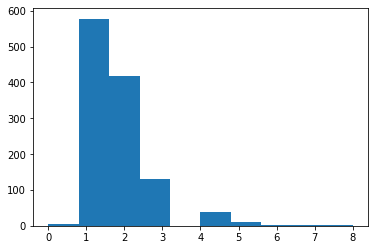

In [493]:
# exploring the number of developers per game
num_developers=[]

for i in developers:
    num_developers.append(len(i))
    if len(i) >4:
        print(i)
        
plt.hist(num_developers)

In [497]:
# creating a developer dataframe
developer_df=pd.DataFrame(
    {
        "game":game_df["name"],
        "developer":developers,
        "number of devs":num_developers,
        "rating":game_df["rating"],
        "rating count":game_df["rating count"],
        "metacritic":game_df["metacritic score"]
    }
)

#developer_df=developer_df[developer_df["number of devs"]>0]
developer_df=developer_df[developer_df["developer"]!="missing"]
developer_df=developer_df[developer_df["developer"].map(len) > 0]

for i in developer_df.index:
    developer_df.loc[i,"first dev"]=str(developer_df.loc[i,"developer"][0])
    
developer_df["first dev"].unique()

array(['CD PROJEKT RED', 'DONTNOD Entertainment', 'Rockstar Games',
       'Bethesda Softworks', 'Bethesda Game Studios',
       'SCE Santa Monica Studio', 'Psyonix',
       'Konami Digital Entertainment', 'Bungie, Inc.', 'Guerrilla Games',
       'Crystal Dynamics', 'IO Interactive', 'Rocksteady Studios',
       'Naughty Dog', 'Eidos Montreal', 'Insomniac Games',
       'BANDAI NAMCO Entertainment America Inc.', 'Blue Byte',
       'FromSoftware', 'Arkane Studios', 'Avalanche Studios',
       'Ninja Theory', 'Klei Entertainment', 'High Voltage Software',
       'Quantic Dream', 'Team Cherry', 'Bloober Team S.A.',
       'CHUCKLEFISH LIMITED', 'Bluehole, Inc.', 'Colossal Order Ltd.',
       'Campo Santo', 'Hi-Rez Studios', 'Playdead', 'Platinum Games',
       'Kaiko', 'Capcom', 'Beenox', 'Codemasters', 'tobyfox',
       'Frictional Games', 'Respawn Entertainment', 'Ubisoft', '2K',
       'Double Fine Productions', 'Kojima Productions', '2K Czech',
       'Electronic Arts', 'Devolver Di

In [498]:
developer_df.to_csv("csvfiles/developers.csv")
developer_df.head()

,game,developer,number of devs,rating,rating count,metacritic,first dev
0,The Witcher 3: Wild Hunt,[CD PROJEKT RED],1,4.67,3480,93,CD PROJEKT RED
1,Life is Strange,[DONTNOD Entertainment],1,4.10,2222,83,DONTNOD Entertainment
2,Red Dead Redemption 2,[Rockstar Games],1,4.56,2546,96,Rockstar Games
3,DOOM (2016),"[Bethesda Softworks, id Software]",2,4.40,2178,85,Bethesda Softworks
4,Fallout 4,[Bethesda Game Studios],1,3.75,1989,84,Bethesda Game Studios


In [499]:
dev_gamecount=pd.DataFrame(developer_df.groupby("first dev")["rating"].agg(["count","mean","median","var","std","sem"]))
dev_gamecount=dev_gamecount.sort_values("count",ascending=False)
dev_gamecount=dev_gamecount[dev_gamecount["count"]>1]
dev_gamecount["average rating count"]=developer_df.groupby("first dev")["rating count"].mean()
dev_gamecount.head(10)

,count,mean,median,var,std,sem,average rating count
first dev,,,,,,,
BANDAI NAMCO Entertainment America Inc.,21,3.610000,3.620,0.263960,0.513770,0.112114,212.666667
Devolver Digital,16,3.650000,3.765,0.144560,0.380210,0.095053,235.062500
Nintendo,15,4.084667,4.320,0.275970,0.525328,0.135639,339.666667
Ubisoft,14,3.538571,3.595,0.193013,0.439333,0.117417,402.785714
Electronic Arts,14,3.488571,3.440,0.091352,0.302244,0.080778,315.071429
Daedalic Entertainment,12,3.308333,3.210,0.303942,0.551310,0.159149,50.416667
Capcom,12,4.030833,4.150,0.160372,0.400465,0.115604,429.083333
Square Enix,11,3.625455,3.830,0.334147,0.578055,0.174290,238.727273
505 Games,10,3.368000,3.290,0.271751,0.521298,0.164849,193.400000


Text(0, 0.5, 'Frequency')

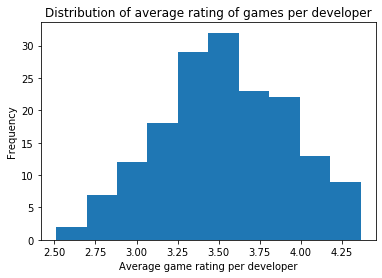

In [500]:
plt.hist(dev_gamecount["mean"],align="left")
plt.title("Distribution of average rating of games per developer")
plt.xlabel("Average game rating per developer")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

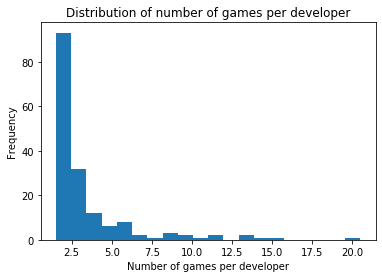

In [501]:
plt.hist(dev_gamecount["count"],align="left",bins=20)
plt.title("Distribution of number of games per developer")
plt.xlabel("Number of games per developer")
plt.ylabel("Frequency")

Text(12, 2.75, 'marker size denotes\naverage number of ratings')

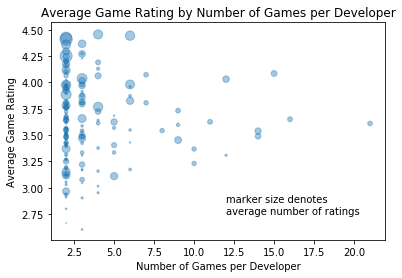

In [504]:
plt.scatter(dev_gamecount["count"],dev_gamecount["mean"],s=dev_gamecount["average rating count"]/10,alpha=0.4)
plt.title("Average Game Rating by Number of Games per Developer")
plt.xlabel("Number of Games per Developer")
plt.ylabel("Average Game Rating")
plt.annotate("marker size denotes\naverage number of ratings",(12,2.75))

In [505]:
stats.linregress(developer_df["rating count"],developer_df["rating"])

LinregressResult(slope=0.0006252241646815716, intercept=3.421680287452371, rvalue=0.3693266046315041, pvalue=1.786674636611654e-39, stderr=4.5816724489175354e-05)

In [427]:
lat=[]
lng=[]

params={
    "inputtype":"textquery",
    "key":g_key,
}

for i in dev_gamecount.index:
    params["input"]=i
    url="https://maps.googleapis.com/maps/api/place/autocomplete/json?parameters"
    response=requests.get(url, params=params).json()
    try:
        place_id=response["predictions"][0]["place_id"]
        url2="https://maps.googleapis.com/maps/api/geocode/json?place_id="+place_id+"&key="+g_key
        response2=requests.get(url2).json()
        lat.append(response2["results"][0]["geometry"]["location"]["lat"])
        lng.append(response2["results"][0]["geometry"]["location"]["lng"])
    except:
        lat.append("missing")
        lng.append("missing")

dev_gamecount["lat"]=lat
dev_gamecount["lng"]=lng
dev_gamecount=dev_gamecount[dev_gamecount["lat"]!="missing"]
dev_gamecount

,count,mean,median,var,std,sem,average rating count,lat,lng
first dev,,,,,,,,,
Nintendo,15,4.085333,4.320,0.276312,0.525654,0.135723,338.866667,40.7581,-73.9794
Electronic Arts,14,3.488571,3.440,0.090429,0.300713,0.080369,314.714286,49.2479,-123.01
Ubisoft,14,3.539286,3.600,0.193146,0.439483,0.117457,402.071429,45.5259,-73.5986
Daedalic Entertainment,12,3.308333,3.210,0.303942,0.551310,0.159149,50.416667,53.6134,9.97112
Capcom,12,4.029167,4.150,0.160190,0.400238,0.115539,428.583333,35.9491,-78.5274
...,...,...,...,...,...,...,...,...,...
Eidos Montreal,2,3.885000,3.885,0.008450,0.091924,0.065000,1012.500000,45.5064,-73.5694
"Bluehole, Inc.",2,3.150000,3.150,0.105800,0.325269,0.230000,669.500000,37.4896,126.729
Tindalos Interactive,2,3.805000,3.805,0.006050,0.077782,0.055000,18.500000,48.8846,2.38537


In [450]:
lat_dict=dev_gamecount["lat"].to_dict()
lng_dict=dev_gamecount["lng"].to_dict()
developer_df["lat"]= developer_df["first dev"].map(lat_dict)
developer_df["lng"]= developer_df["first dev"].map(lng_dict)
developer_df


,game,developer,number of devs,rating,rating count,metacritic,first dev,lat,lng
0,The Witcher 3: Wild Hunt,[CD PROJEKT RED],1,4.67,3475,93,CD PROJEKT RED,50.060243,19.920131
1,Life is Strange,[DONTNOD Entertainment],1,4.10,2219,83,DONTNOD Entertainment,48.892459,2.369706
2,Red Dead Redemption 2,[Rockstar Games],1,4.56,2542,96,Rockstar Games,NaN,NaN
3,DOOM (2016),"[Bethesda Softworks, id Software]",2,4.40,2174,85,Bethesda Softworks,39.105248,-77.180634
4,Fallout 4,[Bethesda Game Studios],1,3.75,1988,84,Bethesda Game Studios,39.105248,-77.180634
...,...,...,...,...,...,...,...,...,...
1178,AO International Tennis,[Big Ant Studios],1,3.45,11,58,Big Ant Studios,-37.822057,144.966241
1179,Far Cry 5 - Lost On Mars,[Ubisoft],1,3.57,7,59,Ubisoft,45.525861,-73.598631
1180,CATS: Crash Arena Turbo Stars (C.A.T.S.),[ZeptoLab],1,3.79,14,78,ZeptoLab,NaN,NaN
1181,Card Thief,[Arnold Rauers],1,3.90,9,88,Arnold Rauers,NaN,NaN


In [451]:
developer_df.count()

game              1177
developer         1177
number of devs    1177
rating            1177
rating count      1177
metacritic        1177
first dev         1177
lat                440
lng                440
dtype: int64

In [452]:
developer_df_2=developer_df.dropna(how="any").copy()
developer_df_2.count()

game              440
developer         440
number of devs    440
rating            440
rating count      440
metacritic        440
first dev         440
lat               440
lng               440
dtype: int64

In [453]:
dev_gamecount=dev_gamecount.sort_values("mean",ascending=False)
top_devs_df=dev_gamecount[0:10]
lat=[]
lng=[]
for i in top_devs_df.index:
    for j in developer_df.index:
        if developer_df.loc[j,"first dev"]==i:
            lat.append(developer_df.loc[j,"lat"])
            lng.append(developer_df.loc[j,"lng"])
            continue
            
top_devs_df

,count,mean,median,var,std,sem,average rating count,lat,lng
first dev,,,,,,,,,
FromSoftware,4,4.452500,4.385,0.021092,0.145230,0.072615,824.750000,35.6733,139.662
CD PROJEKT RED,6,4.443333,4.700,0.207307,0.455309,0.185879,876.333333,50.0602,19.9201
Naughty Dog,2,4.410000,4.410,0.028800,0.169706,0.120000,1533.000000,34.0281,-118.471
Larian Studios,3,4.366667,4.380,0.003733,0.061101,0.035277,575.000000,51.0608,3.71371
Moon Studios GmbH,2,4.360000,4.360,0.001800,0.042426,0.030000,838.500000,48.2055,16.3534
Monolith Soft,3,4.273333,4.300,0.012633,0.112398,0.064893,75.666667,50.3283,30.2891
Platinum Games,3,4.266667,4.310,0.012433,0.111505,0.064377,460.000000,34.7054,135.491
Insomniac Games,2,4.250000,4.250,0.088200,0.296985,0.210000,1463.000000,34.1935,-118.345
Firaxis,2,4.245000,4.245,0.018050,0.134350,0.095000,417.500000,39.5213,-76.6463


In [454]:
# configure gmaps
gmaps.configure(api_key=g_key)

# Use the Lat and Lng as locations
locations=developer_df_2[["lat","lng"]]
# create heatmap
fig = gmaps.figure(center=(20,0),zoom_level=2)
heatmap_layer = gmaps.heatmap_layer(
    locations,
    weights=developer_df_2["rating"],
    dissipating=False,
    max_intensity=50,
    point_radius=3
)
fig.add_layer(heatmap_layer)

In [466]:
top_devs_df=top_devs_df.reset_index()
top_devs_df["mean"]=round(top_devs_df["mean"],2)

In [467]:
info_box_template = """
<dl>
<dt>Developer</dt><dd>{first dev}</dd>
<dt>Number of Games</dt><dd>{count}</dd>
<dt>Average Rating</dt><dd>{mean}</dd>
</dl>
"""
dev_info = [info_box_template.format(**row) for index, row in top_devs_df.iterrows()]
locations = top_devs_df[["lat", "lng"]]

In [468]:
# Add marker layer ontop of heat map
markers=gmaps.marker_layer(locations,info_box_content=dev_info)
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))